# Postest 6

### Nama : Daviana Dwitasari
### NIM : 2109106064

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Memilih Atribut X dan y

In [3]:
x = df[['age', 'avg_glucose_level']]
y = df['hypertension']

### Membagi Training Set dan Test Set

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
print ("dimensi x train : " , x_train.shape)
print ("dimensi x test : " , x_test.shape)
print ("dimensi y train : " , y_train.shape)
print ("dimensi y test : " , y_test.shape)

dimensi x train :  (4088, 2)
dimensi x test :  (1022, 2)
dimensi y train :  (4088,)
dimensi y test :  (1022,)


### Preprocessing memakai Normalisasi

In [6]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Sequential

In [7]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

### Compile model menggunakan binary_crossentropy accuracy

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Melatih Model

In [9]:
history = model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.1)

Epoch 1/50
115/115 [==============================] - 1s 4ms/step - loss: 0.3936 - accuracy: 0.9021 - val_loss: 0.2443 - val_accuracy: 0.9169
Epoch 2/50
115/115 [==============================] - 0s 2ms/step - loss: 0.2705 - accuracy: 0.9049 - val_loss: 0.2381 - val_accuracy: 0.9169
Epoch 3/50
115/115 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.9049 - val_loss: 0.2309 - val_accuracy: 0.9169
Epoch 4/50
115/115 [==============================] - 0s 2ms/step - loss: 0.2651 - accuracy: 0.9049 - val_loss: 0.2298 - val_accuracy: 0.9169
Epoch 5/50
115/115 [==============================] - 0s 2ms/step - loss: 0.2650 - accuracy: 0.9049 - val_loss: 0.2299 - val_accuracy: 0.9169
Epoch 6/50
115/115 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.9049 - val_loss: 0.2312 - val_accuracy: 0.9169
Epoch 7/50
115/115 [==============================] - 0s 2ms/step - loss: 0.2638 - accuracy: 0.9049 - val_loss: 0.2318 - val_accuracy: 0.9169
Epoch 

### Melatih Model dengan Accurasy

In [11]:
y_pred = (model.predict(x_test) > 0.5).astype('int32')
accuracy = accuracy_score(y_test,y_pred)

32/32 [==============================] - 0s 1ms/step


### Grafik Accurasy

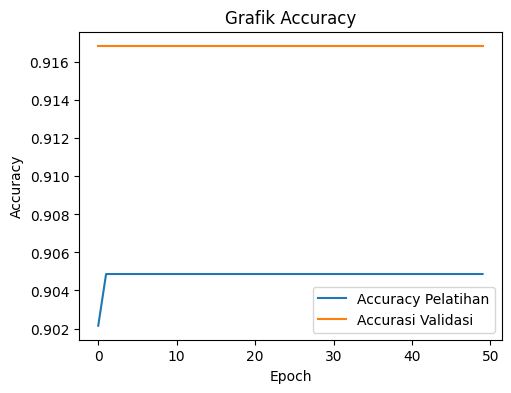

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Accuracy Pelatihan')
plt.plot(history.history['val_accuracy'], label='Accurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Grafik Accuracy')
plt.legend(loc='lower right')
plt.show()

### Grafik Loss

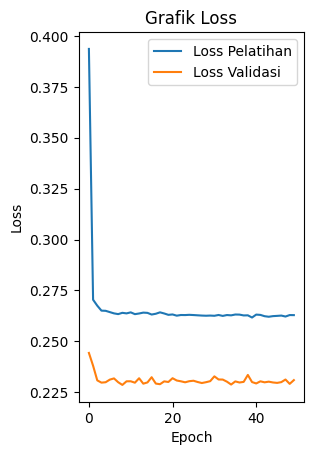

In [13]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Grafik Loss')
plt.show()
     

### Nilai Akurasi Model

In [14]:
print(accuracy)

0.8884540117416829
